# 干涉及衍射成像仿真

In [3]:
import pimms.optics as op
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.tri as mtri

In [1]:
# 简单卡氏系统单色光理想成像条件下的衍射极限点扩展函数仿真
tel=op.CassegrainReflector(detector_n=512,detector_fov=np.deg2rad(1./3600))
opn=op.OpticalPathNetwork(tel)
src=op.LightSource((0.,np.deg2rad(0./3600),np.inf),wavelength=5e-7)
dat=opn.image(src,tel.get_detectors()[0],1e-3,min_samplings=10000,batch_rays=10000,collect_runtime_data=True,verbose=True)
I=np.abs(tel.get_detectors()[0].amplitude_map)**2.

Re-calibrate the field of view...
  Batch 0: 9771 object rays traced at exit.
  Batch 0: 9771 reference rays traced at exit.
  Batch 0: 9771 ray-pairs traced at exit.
  Batch 0: 9771 points sampled at pupil, S-stat: 1.36E-20 (min), 1.35E-16 (avg), 6.19E-16 (max).
  Batch 1: 9752 object rays traced at exit.
  Batch 1: 9752 reference rays traced at exit.
  Batch 1: 9752 ray-pairs traced at exit.
  Batch 1: 9752 points sampled at pupil, S-stat: 1.36E-20 (min), 1.35E-16 (avg), 6.35E-16 (max).
Triangular beam analyzing on entrance 0...
  Entrance 0: 38951 triangles constructed.
  Entrance 0: 38928 triangles selected.
  Entrance 0: triangle areas on wavefront at entrance 7.24E-08 (min), 7.76E-04 (max), 7.61E-05 (avg), 6.70E-05 (std).
  Entrance 0: triangle areas on wavefront at exit 7.24E-10 (min), 7.77E-06 (max), 7.61E-07 (avg), 6.70E-07 (std).
  Entrance 0: beam compressing from entrance to exit 1.00E+02 (min), 1.00E+02 (max), 1.00E+02 (avg), 1.98E-04 (std).
  Entrance 0: photons per ray o

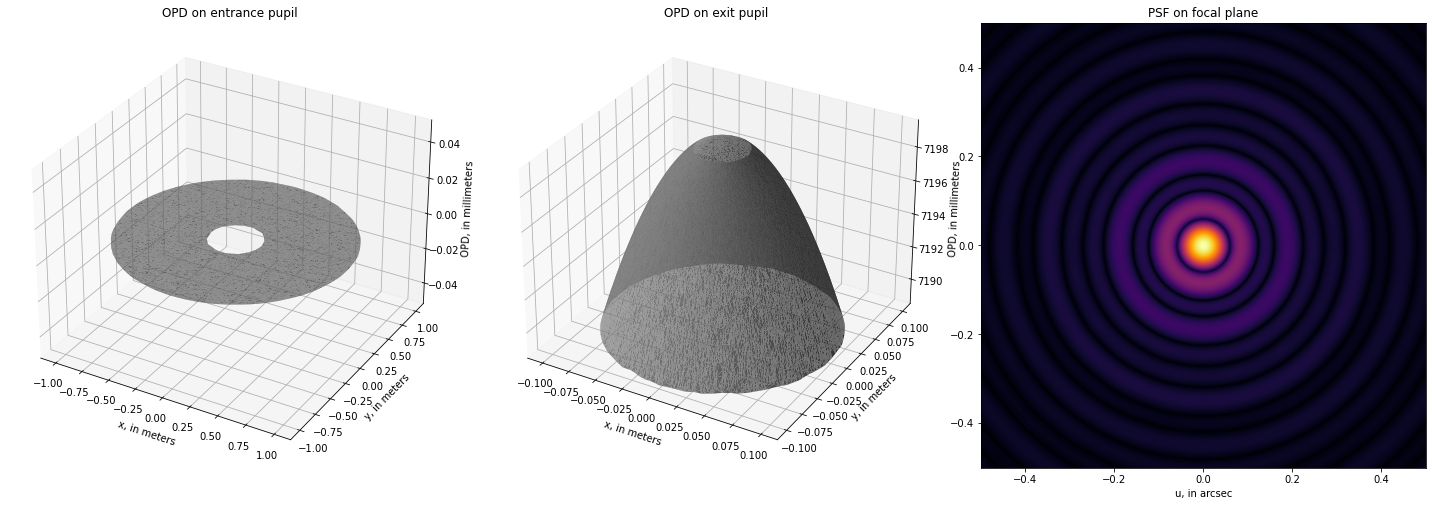

In [118]:
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(131,projection='3d')
trig=mtri.Triangulation(
    dat['object_rays_at_entrance']['position'][:,0],
    dat['object_rays_at_entrance']['position'][:,1],
    dat['TBA_entrance_0']['delaunay_triangles_initial'].simplices)
trig.set_mask(dat['TBA_entrance_0']['delaunay_triangles_mask'])
ax.plot_trisurf(trig,1e3*dat['object_rays_at_entrance']['distance'],color='gray')
ax.set_title('OPD on entrance pupil')
ax.set_xlabel('x, in meters')
ax.set_ylabel('y, in meters')
ax.set_zlabel('OPD, in millimeters')
ax=fig.add_subplot(132,projection='3d')
trig.x=dat['object_rays_at_exit']['position'][:,0]
trig.y=dat['object_rays_at_exit']['position'][:,1]
ax.plot_trisurf(trig,1e3*dat['object_rays_at_exit']['distance'],color='gray')
ax.set_title('OPD on exit pupil')
ax.set_xlabel('x, in meters')
ax.set_ylabel('y, in meters')
ax.set_zlabel('OPD, in millimeters')
ax=fig.add_subplot(133)
# tel.parts[0]是入瞳面、虚拟平面
# tel.parts[1]是主镜面、抛物面，f为其主焦距
# tel.parts[2]是副镜面、双曲面，f为其近焦距，g为其远焦距
# tel.parts[3]是焦平面探测器、平面
da=-np.rad2deg(np.arctan(.5*tel.parts[3].a/tel.parts[2].g*tel.parts[2].f/tel.parts[1].f))*3600.
ax.imshow(I,norm=colors.PowerNorm(.3,0.,np.max(I)),cmap='inferno',extent=(-da,da,-da,da))
ax.set_title('PSF on focal plane')
ax.set_xlabel('u, in arcsec')
plt.tight_layout()

Re-calibrate the field of view...


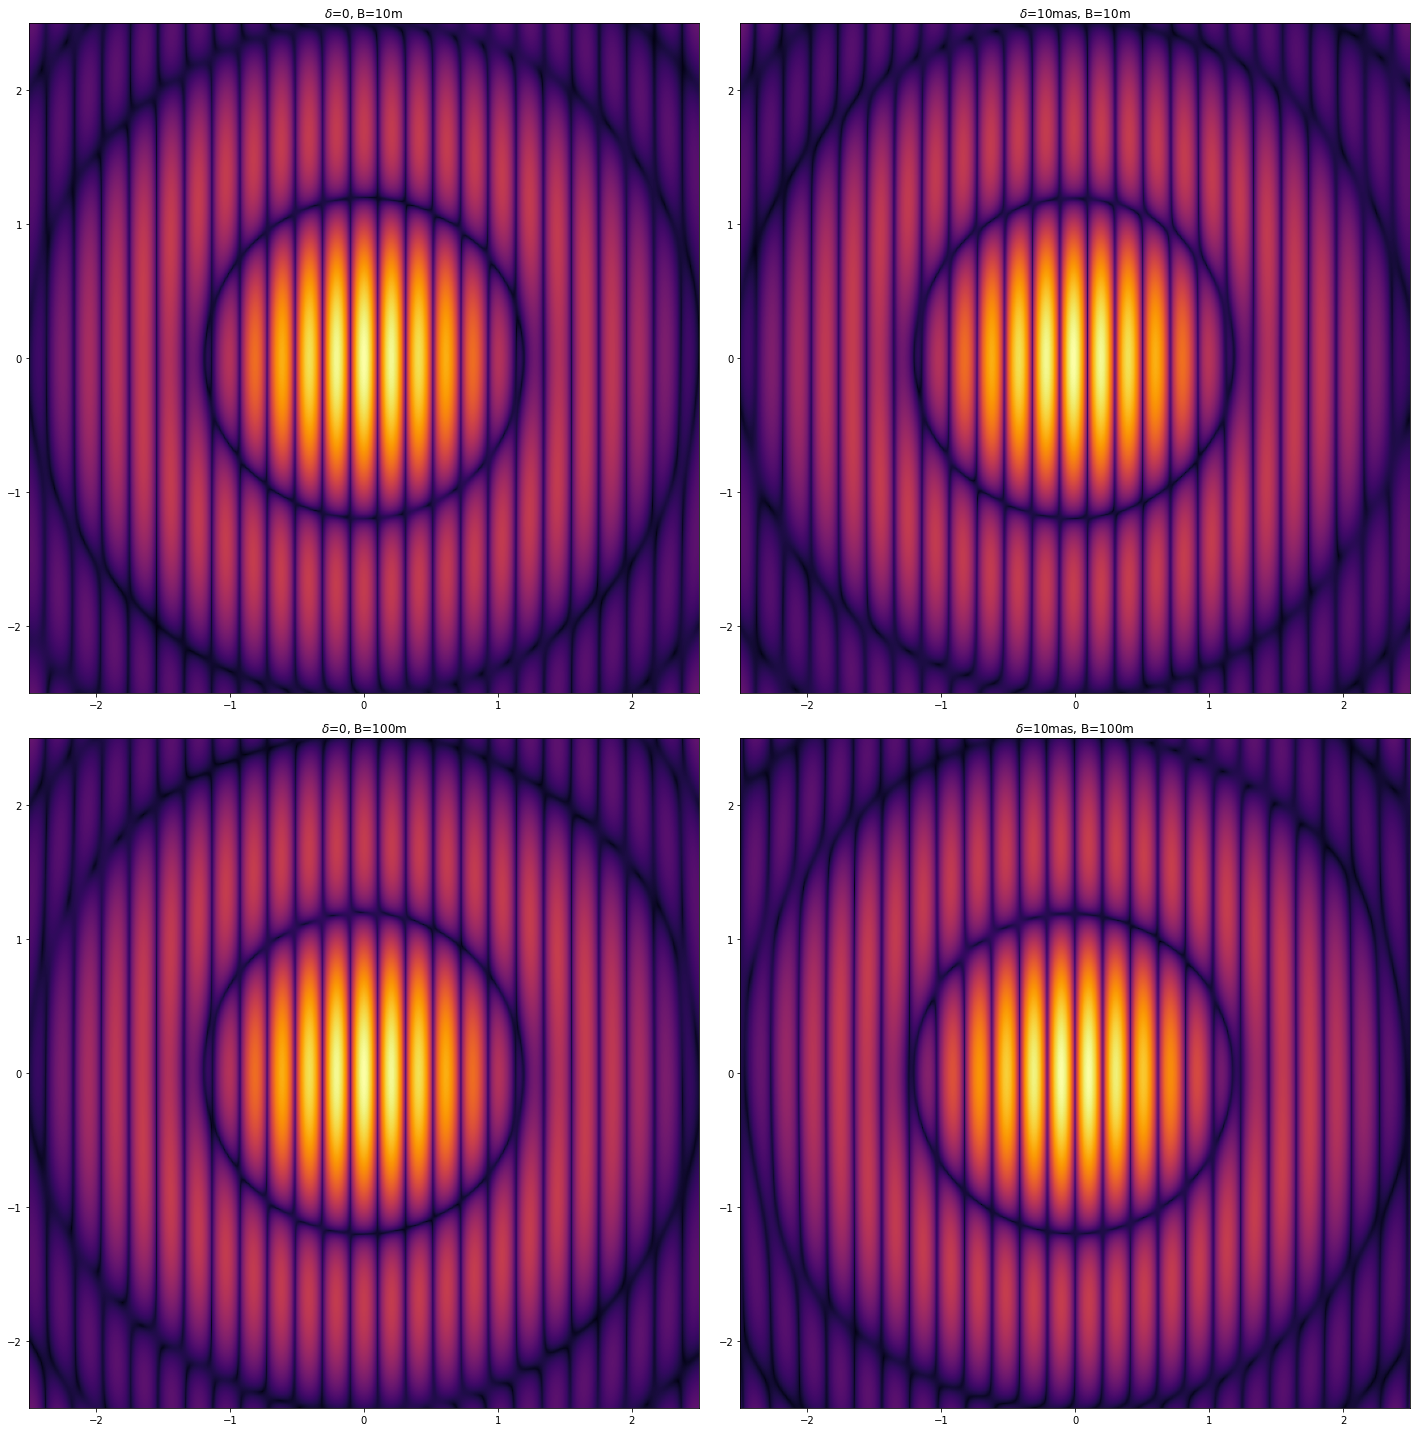

In [101]:
# 简单麦氏干涉仪焦面成像仿真
# 干涉仪初始基线10米
sim=op.SIM(detector_n=512,detector_fov=np.deg2rad(5./3600),detector_a=.01,init_b=10.)
det=sim.get_detectors()[0]
da=-np.rad2deg(np.arctan(sim.parts[12].a/2./(sim.combiner.parts[3].g*sim.combiner.parts[2].f/sim.combiner.parts[3].f*sim.collectors[0].parts[1].f/sim.collectors[0].parts[2].f)))*3600.
delta=np.arcsin(5e-6/100.)
opn=op.OpticalPathNetwork(sim)
# 正入射光源，波长10微米
src=op.LightSource((0.,0.,np.inf),wavelength=1e-5)
dat=opn.image(src,det,1e-3,verbose=False)
I0=np.abs(det.amplitude_map)**2.
# 小角（10毫角秒）斜入射光源
src=op.LightSource((0.,delta,np.inf),wavelength=1e-5)
dat=opn.image(src,det,1e-3,verbose=False)
I1=np.abs(det.amplitude_map)**2.
sim.collectors[0].move([-45.,0.,0.])
sim.collectors[1].move([ 45.,0.,0.])
src=op.LightSource((0.,0.,np.inf),wavelength=1e-5)
dat=opn.image(src,det,1e-3,verbose=False)
I2=np.abs(det.amplitude_map)**2.
src=op.LightSource((0.,delta,np.inf),wavelength=1e-5)
dat=opn.image(src,det,1e-3,verbose=False)
I3=np.abs(det.amplitude_map)**2.
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(221)
ax.imshow(I0,norm=colors.PowerNorm(.2,0.,np.max(I0)),extent=(-da,da,-da,da),cmap='inferno')
ax.set_title(r'$\delta$=0, B=10m')
ax=fig.add_subplot(222)
ax.imshow(I1,norm=colors.PowerNorm(.2,0.,np.max(I1)),extent=(-da,da,-da,da),cmap='inferno')
ax.set_title(r'$\delta$=10mas, B=10m')
ax=fig.add_subplot(223)
ax.imshow(I2,norm=colors.PowerNorm(.2,0.,np.max(I2)),extent=(-da,da,-da,da),cmap='inferno')
ax.set_title(r'$\delta$=0, B=100m')
ax=fig.add_subplot(224)
ax.imshow(I3,norm=colors.PowerNorm(.2,0.,np.max(I3)),extent=(-da,da,-da,da),cmap='inferno')
ax.set_title(r'$\delta$=10mas, B=100m')
plt.tight_layout()

观察上面的4幅图，第一行为10米干涉基线，左侧为正入射光源形成的干涉条纹，右侧为斜入射光源形成的条纹，几乎无法区分；第二行为100米干涉基线，左侧为正入射光源形成条纹，与上方图案无明显区别，右侧为斜入射光源形成的条纹，与上方图案有明显区别。为进一步凸显上述图案区别，各取中间一行绘制曲线如下。

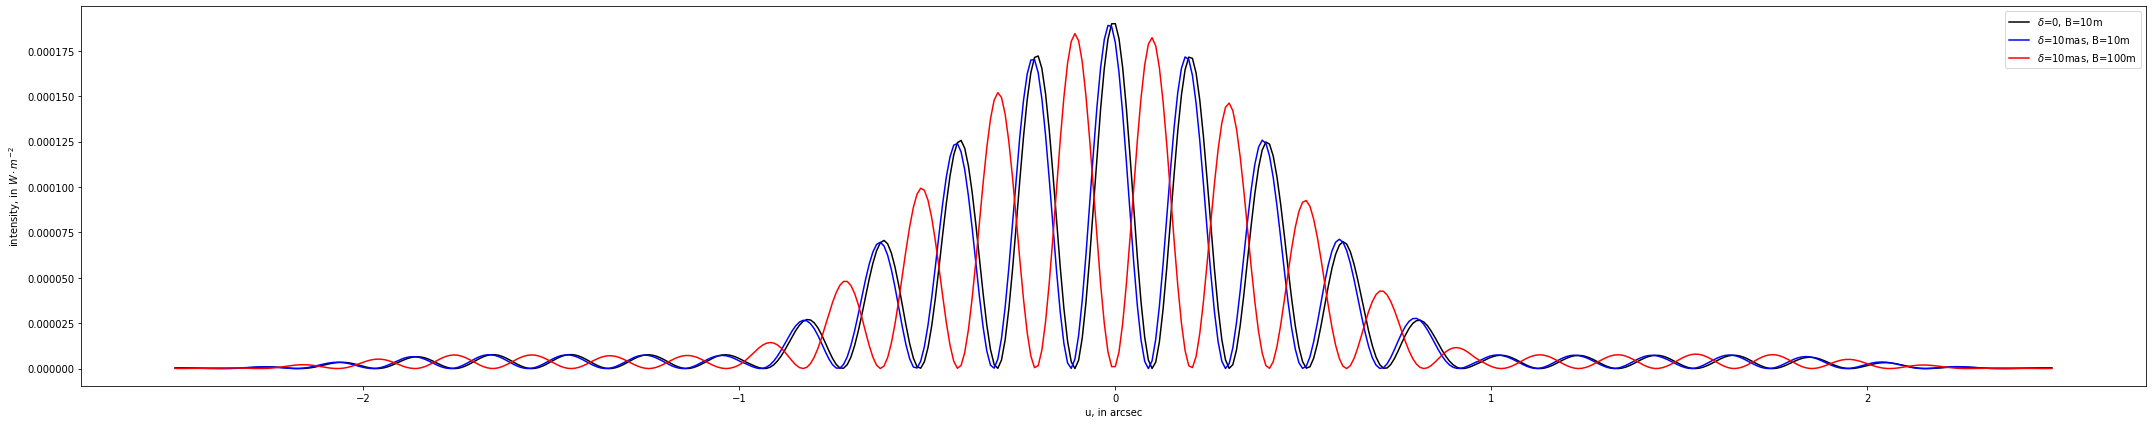

In [102]:
fig=plt.figure(figsize=(30,6))
ax=fig.add_subplot(111)
ax.plot(np.arange(-da,da,da*2./det.npxs),np.max(I0,axis=0),'k',label=r'$\delta$=0, B=10m')
ax.plot(np.arange(-da,da,da*2./det.npxs),np.max(I1,axis=0),'b',label=r'$\delta$=10mas, B=10m')
ax.plot(np.arange(-da,da,da*2./det.npxs),np.max(I3,axis=0),'r',label=r'$\delta$=10mas, B=100m')
ax.set_xlabel('u, in arcsec')
ax.set_ylabel(r'intensity, in $W \cdot m^{-2}$')
ax.legend()
plt.tight_layout()

如上图，充分说明干涉仪基线拉长后，测角能力与分辨能力提升。

In [7]:
# 谱段宽度与OPD相干长度
sim=op.SIM(detector_n=128,detector_fov=np.deg2rad(5./3600),detector_a=.01,init_b=10.)
det=sim.get_detectors()[0]
da=-np.rad2deg(np.arctan(sim.parts[12].a/2./(sim.combiner.parts[3].g*sim.combiner.parts[2].f/sim.combiner.parts[3].f*sim.collectors[0].parts[1].f/sim.collectors[0].parts[2].f)))*3600.
delta=np.arcsin(5e-6/100.)
opn=op.OpticalPathNetwork(sim)
I0=np.zeros((det.npxs,det.npxs))
for wl in np.arange(1e-5,1.001e-5,1e-7):
    src=op.LightSource((0.,0.,np.inf),wavelength=wl)
    dopd=np.random.normal(0.,3e-6)
    sim.collectors[0].move([dopd,0.,0.])
    dat=opn.image(src,det,1e-3,verbose=False)
    I0+=np.abs(det.amplitude_map)**2.
I1=np.zeros((det.npxs,det.npxs))
sim.collectors[0].set_p([-5.,0.,0.])
for wl in np.arange(.7e-5,1.2e-5,1e-7):
    src=op.LightSource((0.,0.,np.inf),wavelength=wl)
    dopd=np.random.normal(0.,3e-6)
    sim.collectors[0].move([dopd,0.,0.])
    dat=opn.image(src,det,1e-3,verbose=False)
    I1+=np.abs(det.amplitude_map)**2.
I2=np.zeros((det.npxs,det.npxs))
sim.collectors[0].set_p([-5.,0.,0.])
for wl in np.arange(.7e-5,1.2e-5,1e-7):
    src=op.LightSource((0.,0.,np.inf),wavelength=wl)
    dopd=np.random.normal(0.,5e-7)
    sim.collectors[0].move([dopd,0.,0.])
    dat=opn.image(src,det,1e-3,verbose=False)
    I2+=np.abs(det.amplitude_map)**2.
I3=np.zeros((det.npxs,det.npxs))
sim.collectors[0].set_p([-5.,0.,0.])
for wl in np.arange(.7e-5,1.2e-5,1e-7):
    src=op.LightSource((0.,0.,np.inf),wavelength=wl)
    dopd=np.random.normal(0.,1e-7)
    sim.collectors[0].move([dopd,0.,0.])
    dat=opn.image(src,det,1e-3,verbose=False)
    I3+=np.abs(det.amplitude_map)**2.

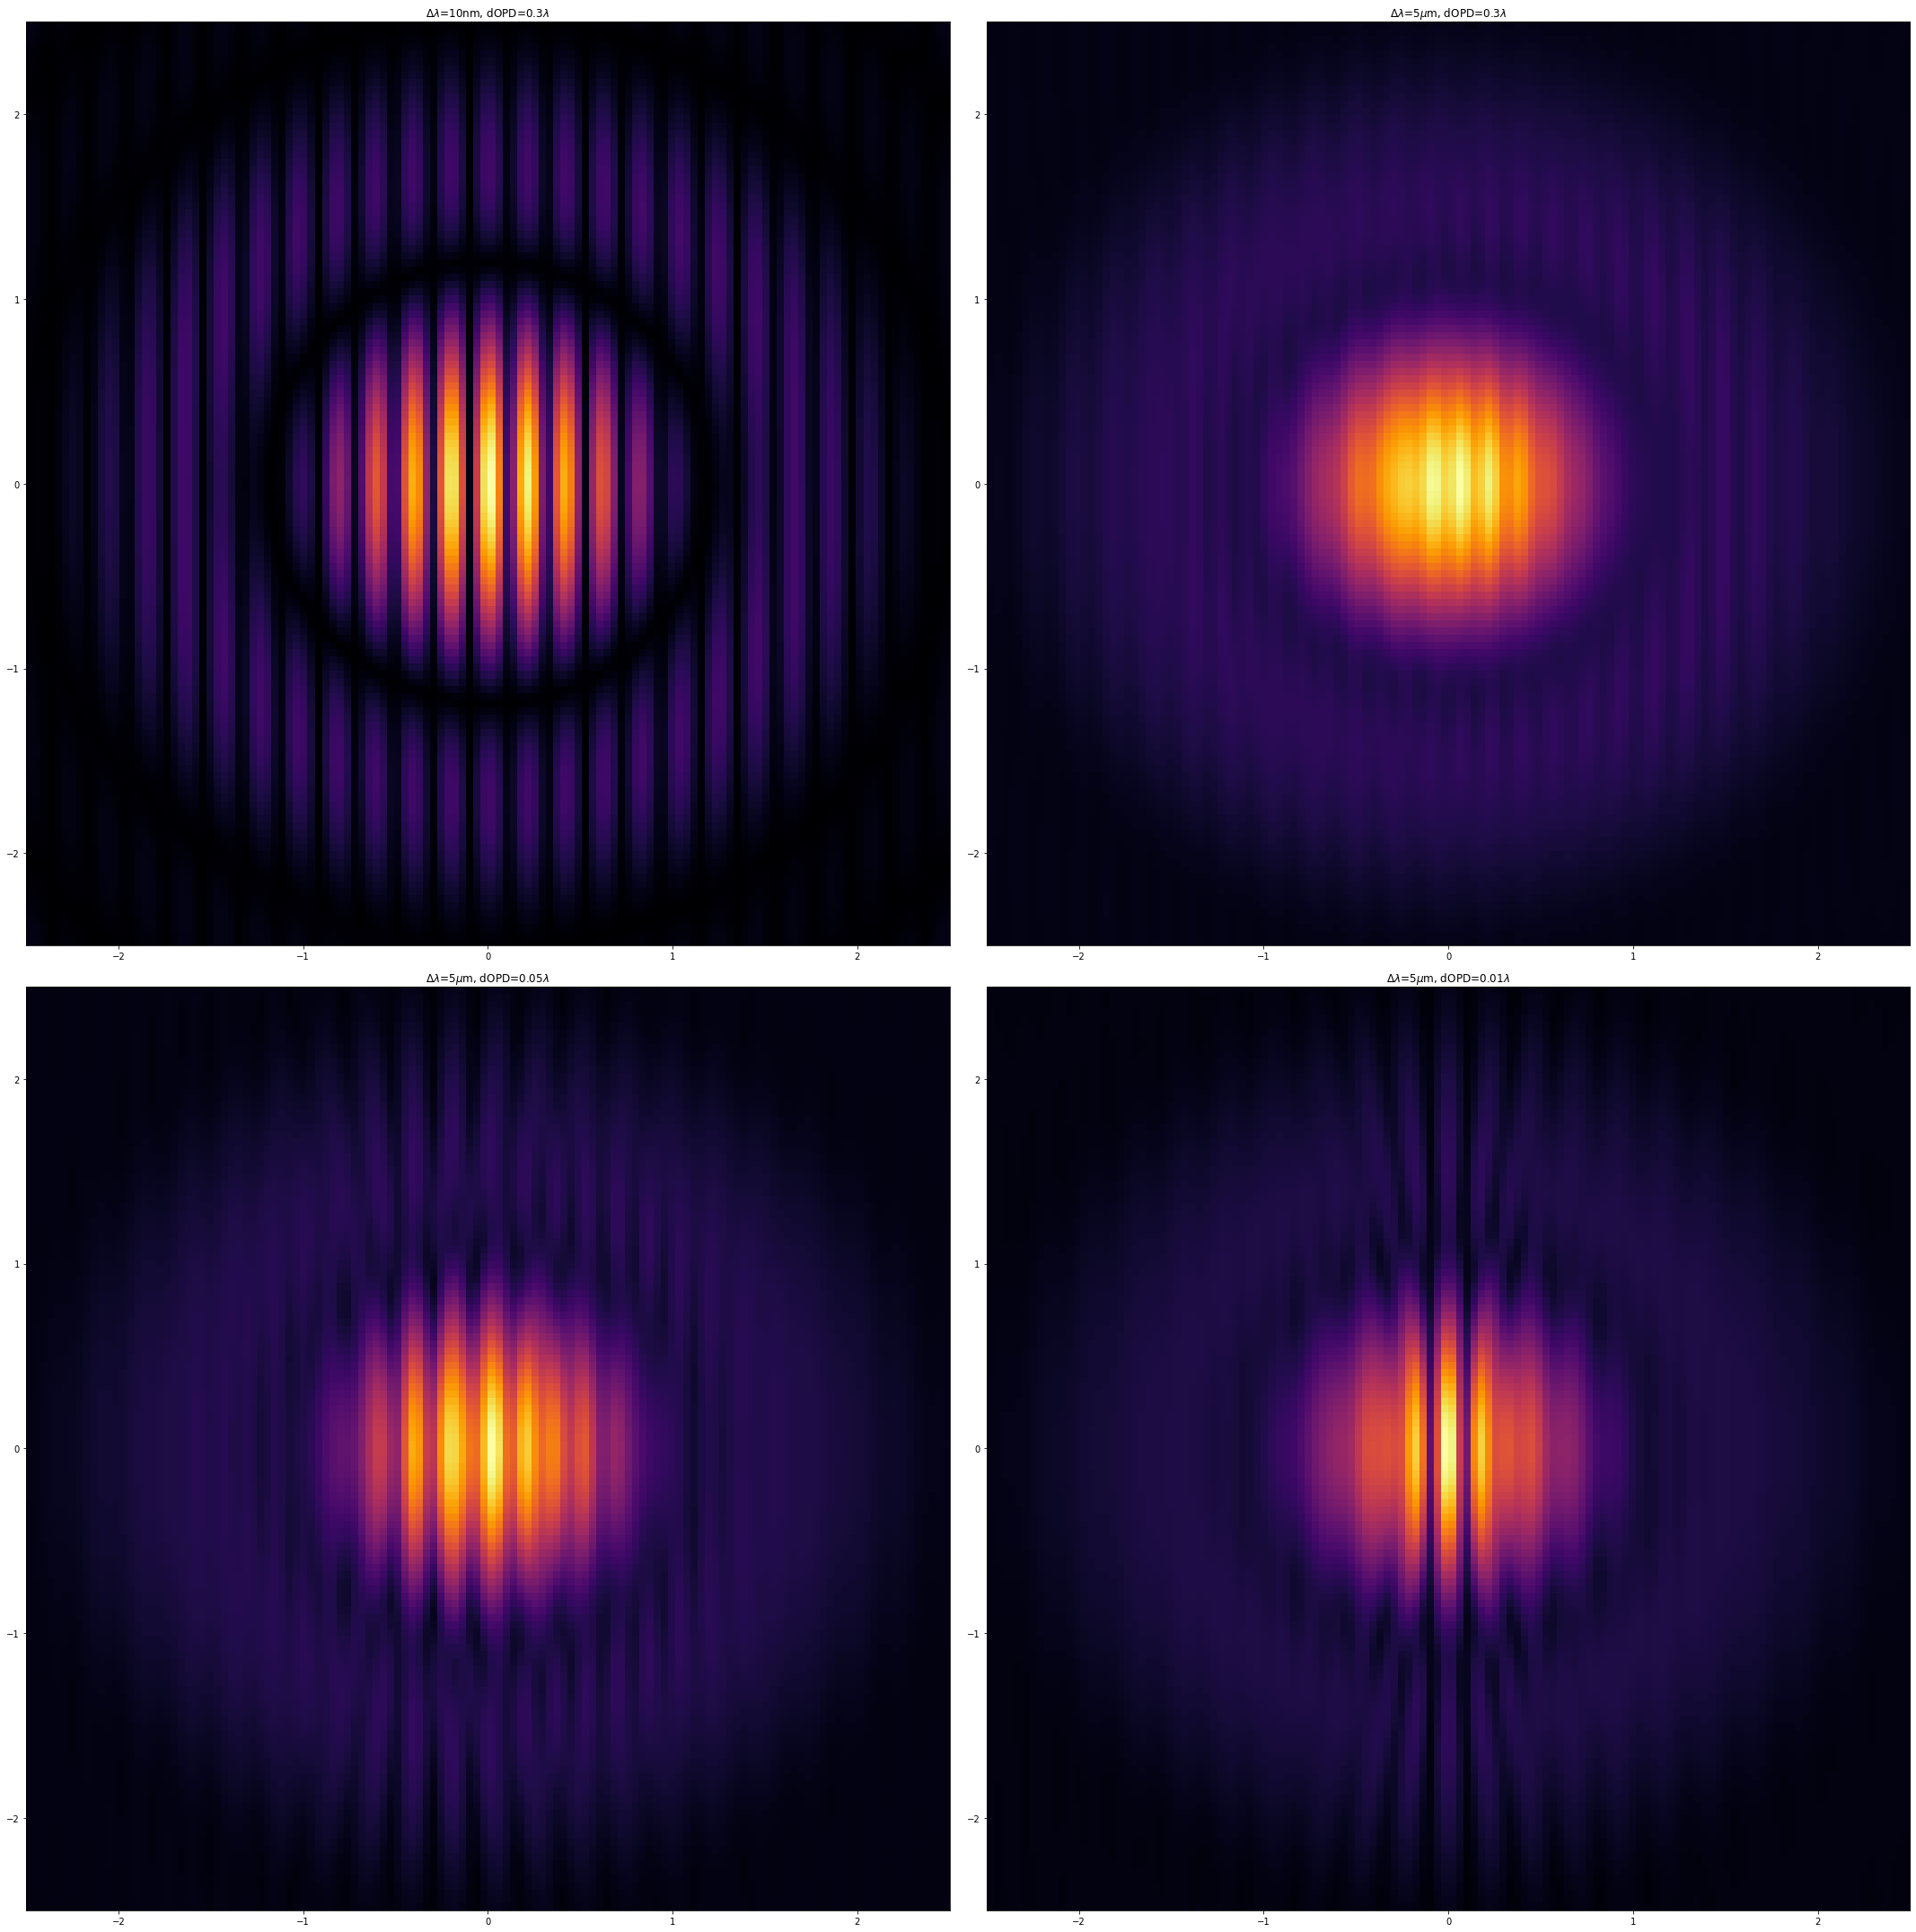

In [11]:
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(221)
ax.imshow(I0,norm=colors.PowerNorm(.5,0.,np.max(I0)),cmap='inferno',extent=(-da,da,-da,da))
ax.set_title(r'$\Delta\lambda$=10nm, dOPD=0.3$\lambda$')
ax=fig.add_subplot(222)
ax.imshow(I1,norm=colors.PowerNorm(.5,0.,np.max(I1)),cmap='inferno',extent=(-da,da,-da,da))
ax.set_title(r'$\Delta\lambda$=5$\mu$m, dOPD=0.3$\lambda$')
ax=fig.add_subplot(223)
ax.imshow(I2,norm=colors.PowerNorm(.5,0.,np.max(I2)),cmap='inferno',extent=(-da,da,-da,da))
ax.set_title(r'$\Delta\lambda$=5$\mu$m, dOPD=0.05$\lambda$')
ax=fig.add_subplot(224)
ax.imshow(I3,norm=colors.PowerNorm(.5,0.,np.max(I3)),cmap='inferno',extent=(-da,da,-da,da))
ax.set_title(r'$\Delta\lambda$=5$\mu$m, dOPD=0.01$\lambda$')
plt.tight_layout()

In [14]:
# Delay line & piston
sim=op.SIM(detector_n=128,detector_fov=np.deg2rad(5./3600),detector_a=.01,init_b=10.)
det=sim.get_detectors()[0]
da=-np.rad2deg(np.arctan(sim.parts[12].a/2./(sim.combiner.parts[3].g*sim.combiner.parts[2].f/sim.combiner.parts[3].f*sim.collectors[0].parts[1].f/sim.collectors[0].parts[2].f)))*3600.
delta=np.arcsin(5e-6/100.)
opn=op.OpticalPathNetwork(sim)
I0=np.zeros((det.npxs,det.npxs))
for wl in np.arange(.7e-5,1.2e-5,1e-7):
    src=op.LightSource((0.,0.,np.inf),wavelength=wl)
    dopd=np.random.normal(0.,1e-2)
    sim.collectors[0].move([dopd,0.,0.])
    dat=opn.image(src,det,1e-3,verbose=False)
    I0+=np.abs(det.amplitude_map)**2.
sim.collectors[0].set_p([-5.,0.,0.])
I1=np.zeros((det.npxs,det.npxs))
for wl in np.arange(.7e-5,1.2e-5,1e-7):
    src=op.LightSource((0.,0.,np.inf),wavelength=wl)
    dopd=np.random.normal(0.,1e-2)
    sim.collectors[0].move([dopd,0.,0.])
    sim.delaylines[0].move([0.,0.,dopd/2.])
    dat=opn.image(src,det,1e-3,verbose=False)
    I1+=np.abs(det.amplitude_map)**2.

Re-calibrate the field of view...


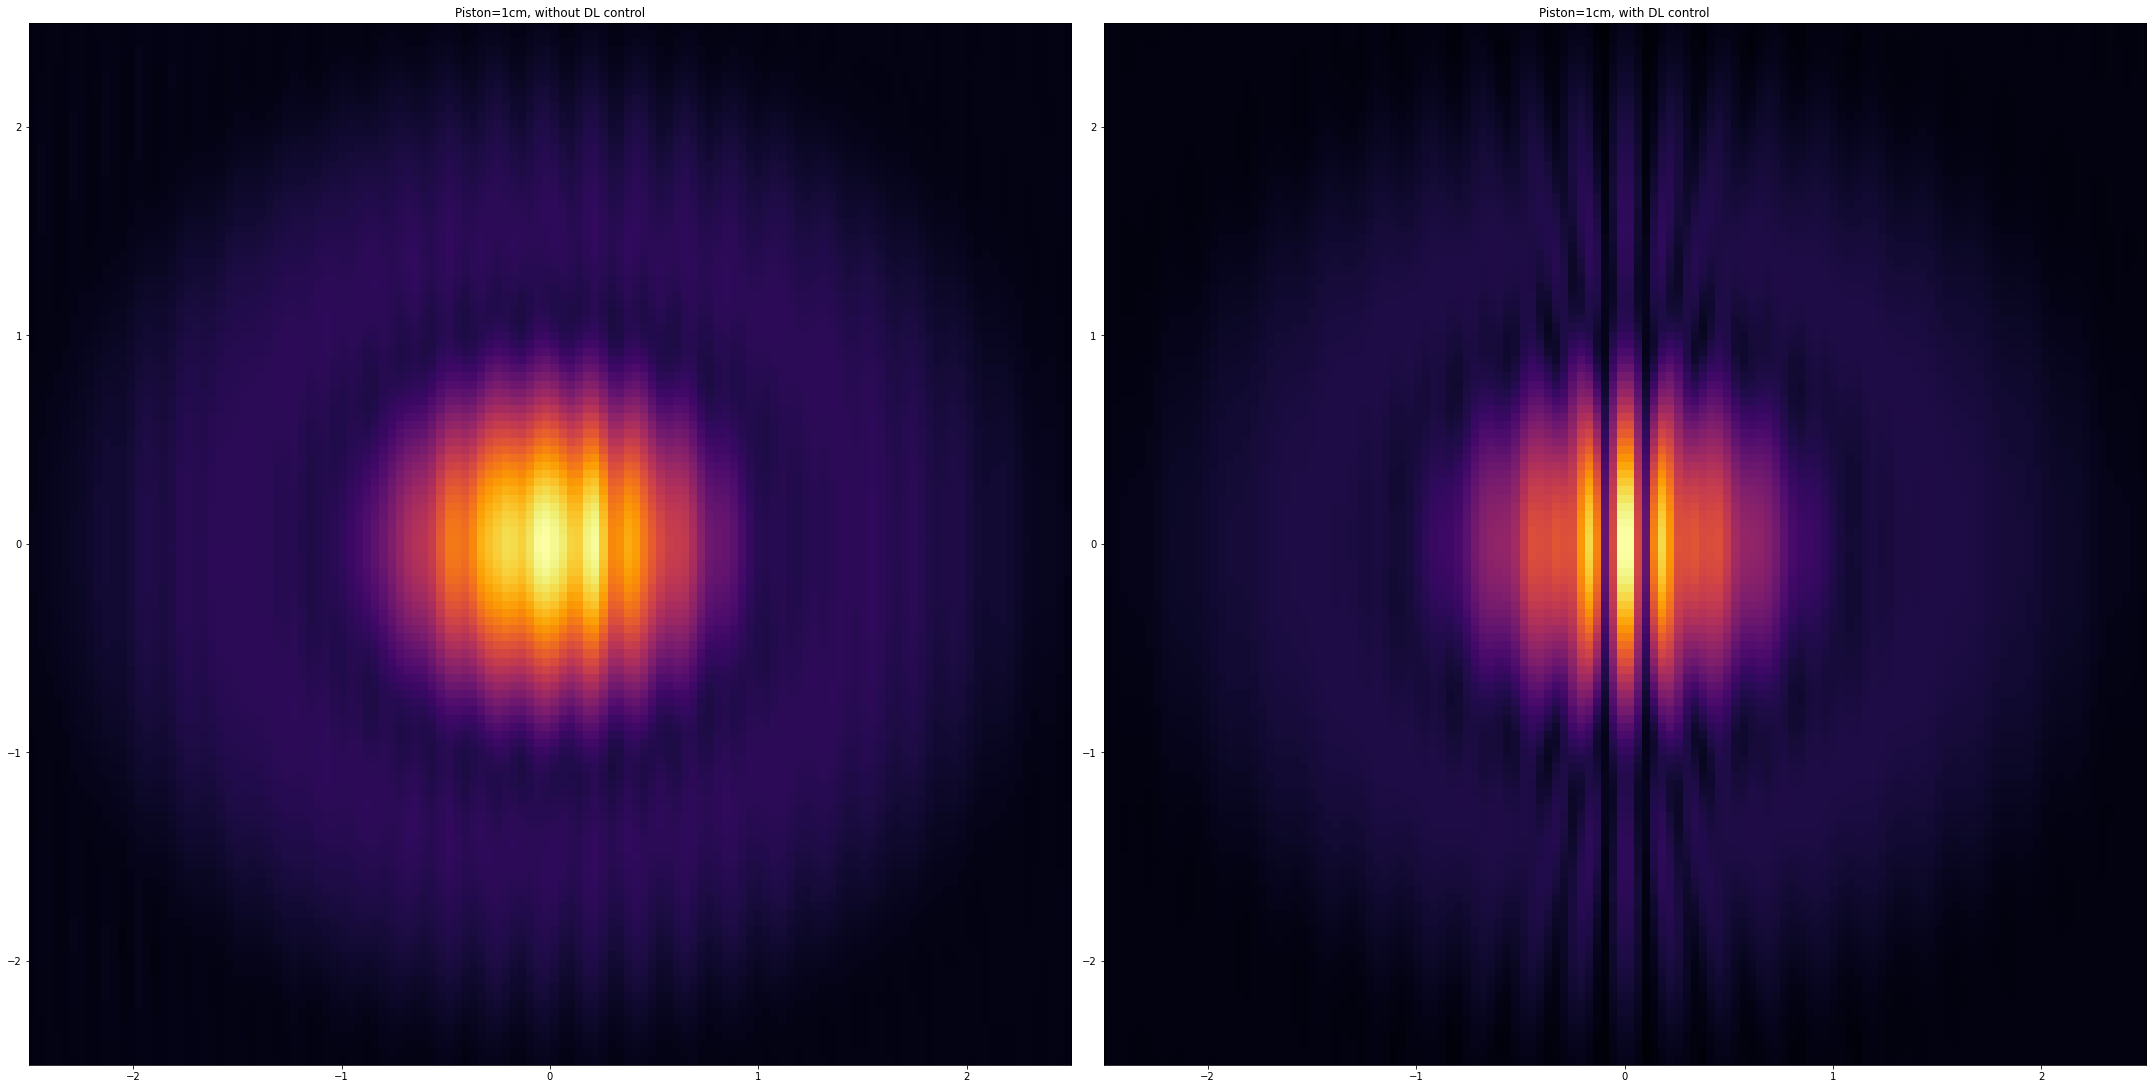

In [17]:
fig=plt.figure(figsize=(30,15))
ax=fig.add_subplot(121)
ax.imshow(I0,norm=colors.PowerNorm(.5,0.,np.max(I0)),cmap='inferno',extent=(-da,da,-da,da))
ax.set_title(r'Piston=1cm, without DL control')
ax=fig.add_subplot(122)
ax.imshow(I1,norm=colors.PowerNorm(.5,0.,np.max(I1)),cmap='inferno',extent=(-da,da,-da,da))
ax.set_title(r'Piston=1cm, with DL control')
plt.tight_layout()

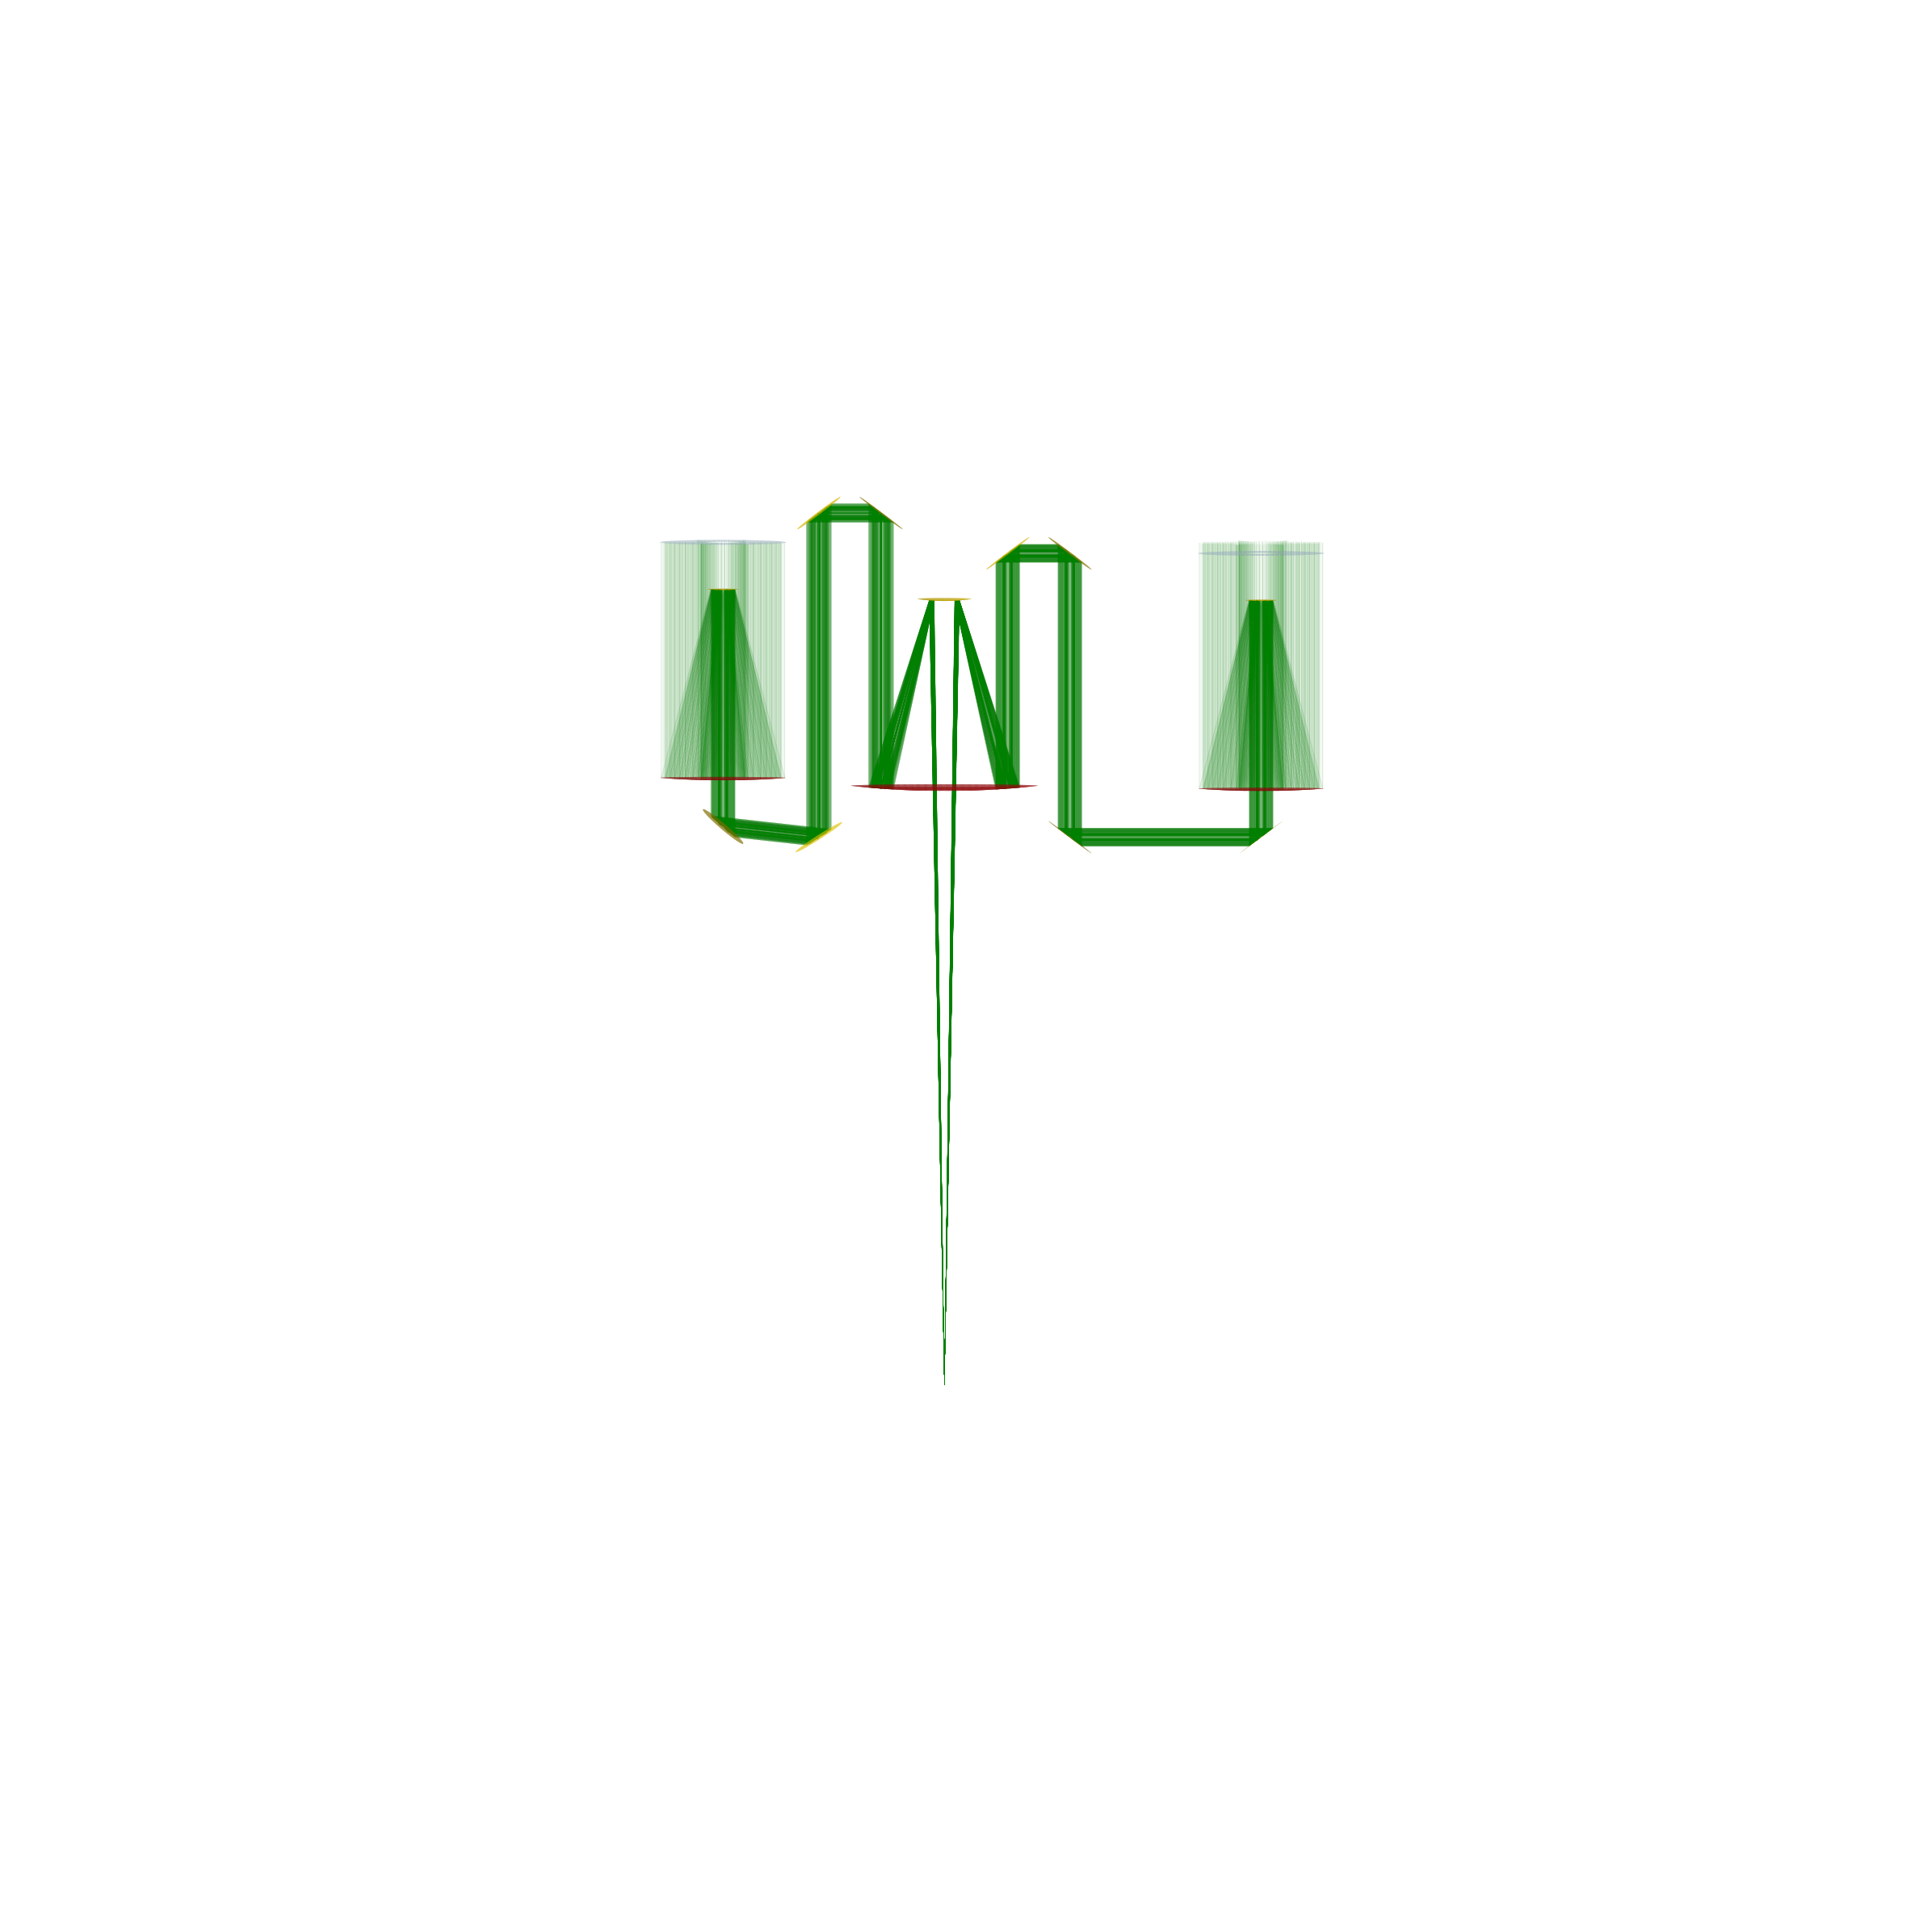

In [104]:
# Periscope & tip-tilt
sim=op.SIM(detector_n=128,detector_fov=np.deg2rad(5./3600),detector_a=.01,init_b=10.)
src=op.LightSource((0.,0.,np.inf))
dp=np.random.normal([0.,0.,0.],1.)
sim.collectors[0].move(dp)
u0=np.array([[0.,0.,1.]]) # unit vector from periscope collector-end mirror to secondary mirror
d0=(sim.periscopes[0].parts[1].p-sim.periscopes[0].parts[0].p)
d1=(sim.periscopes[1].parts[1].p-sim.periscopes[1].parts[0].p)
u1=np.transpose(op.quat.direction(d0)) # unit vector from periscope collector-end to combiner-end
u2=(u0+u1)/np.linalg.norm(u0+u1,axis=-1).reshape((-1,1)) # required normal vector of periscope collector-end mirror
lon,lat,_=op.quat.xyz2ptr(*u2.ravel())
q0=np.array([np.cos((np.pi/2.-lat)/2.),np.sin((np.pi/2.-lat)/2.)*np.cos(np.pi/2.+lon),np.sin((np.pi/2.-lat)/2.)*np.sin(np.pi/2.+lon),0.])
u3=(u0-u1)/np.linalg.norm(u0-u1,axis=-1).reshape((-1,1)) # required normal vector of periscope combiner-end mirror
lon,lat,_=op.quat.xyz2ptr(*u3.ravel())
q1=np.array([np.cos((np.pi/2.-lat)/2.),np.sin((np.pi/2.-lat)/2.)*np.cos(np.pi/2.+lon),np.sin((np.pi/2.-lat)/2.)*np.sin(np.pi/2.+lon),0.])
sim.periscopes[0].parts[0].q=q0
sim.periscopes[0].parts[1].q=q1
sim.delaylines[0].move([
    0.,0.,
    np.squeeze(sim.delaylines[1].p[2])-\
    np.squeeze(sim.delaylines[0].p[2])-\
    np.squeeze((op.quat.norm(d0)-op.quat.norm(d1)-sim.collectors[0].p[2]+sim.collectors[1].p[2])/2.)])
opn=op.OpticalPathNetwork(sim)
p,q=src(sim.get_entrance(),100,1e-3,sampling='crosshair')
pt,mt=sim.trace_network(p,opn)
trig,z,extent=sim.draw(raytrace=pt,figure_size=(2400,2400))

如上图所示，一侧集光器偏离设计位置，导致潜望镜光路方向与光程均偏离预期，可通过潜望镜与延迟线调整补偿。

Re-calibrate the field of view...


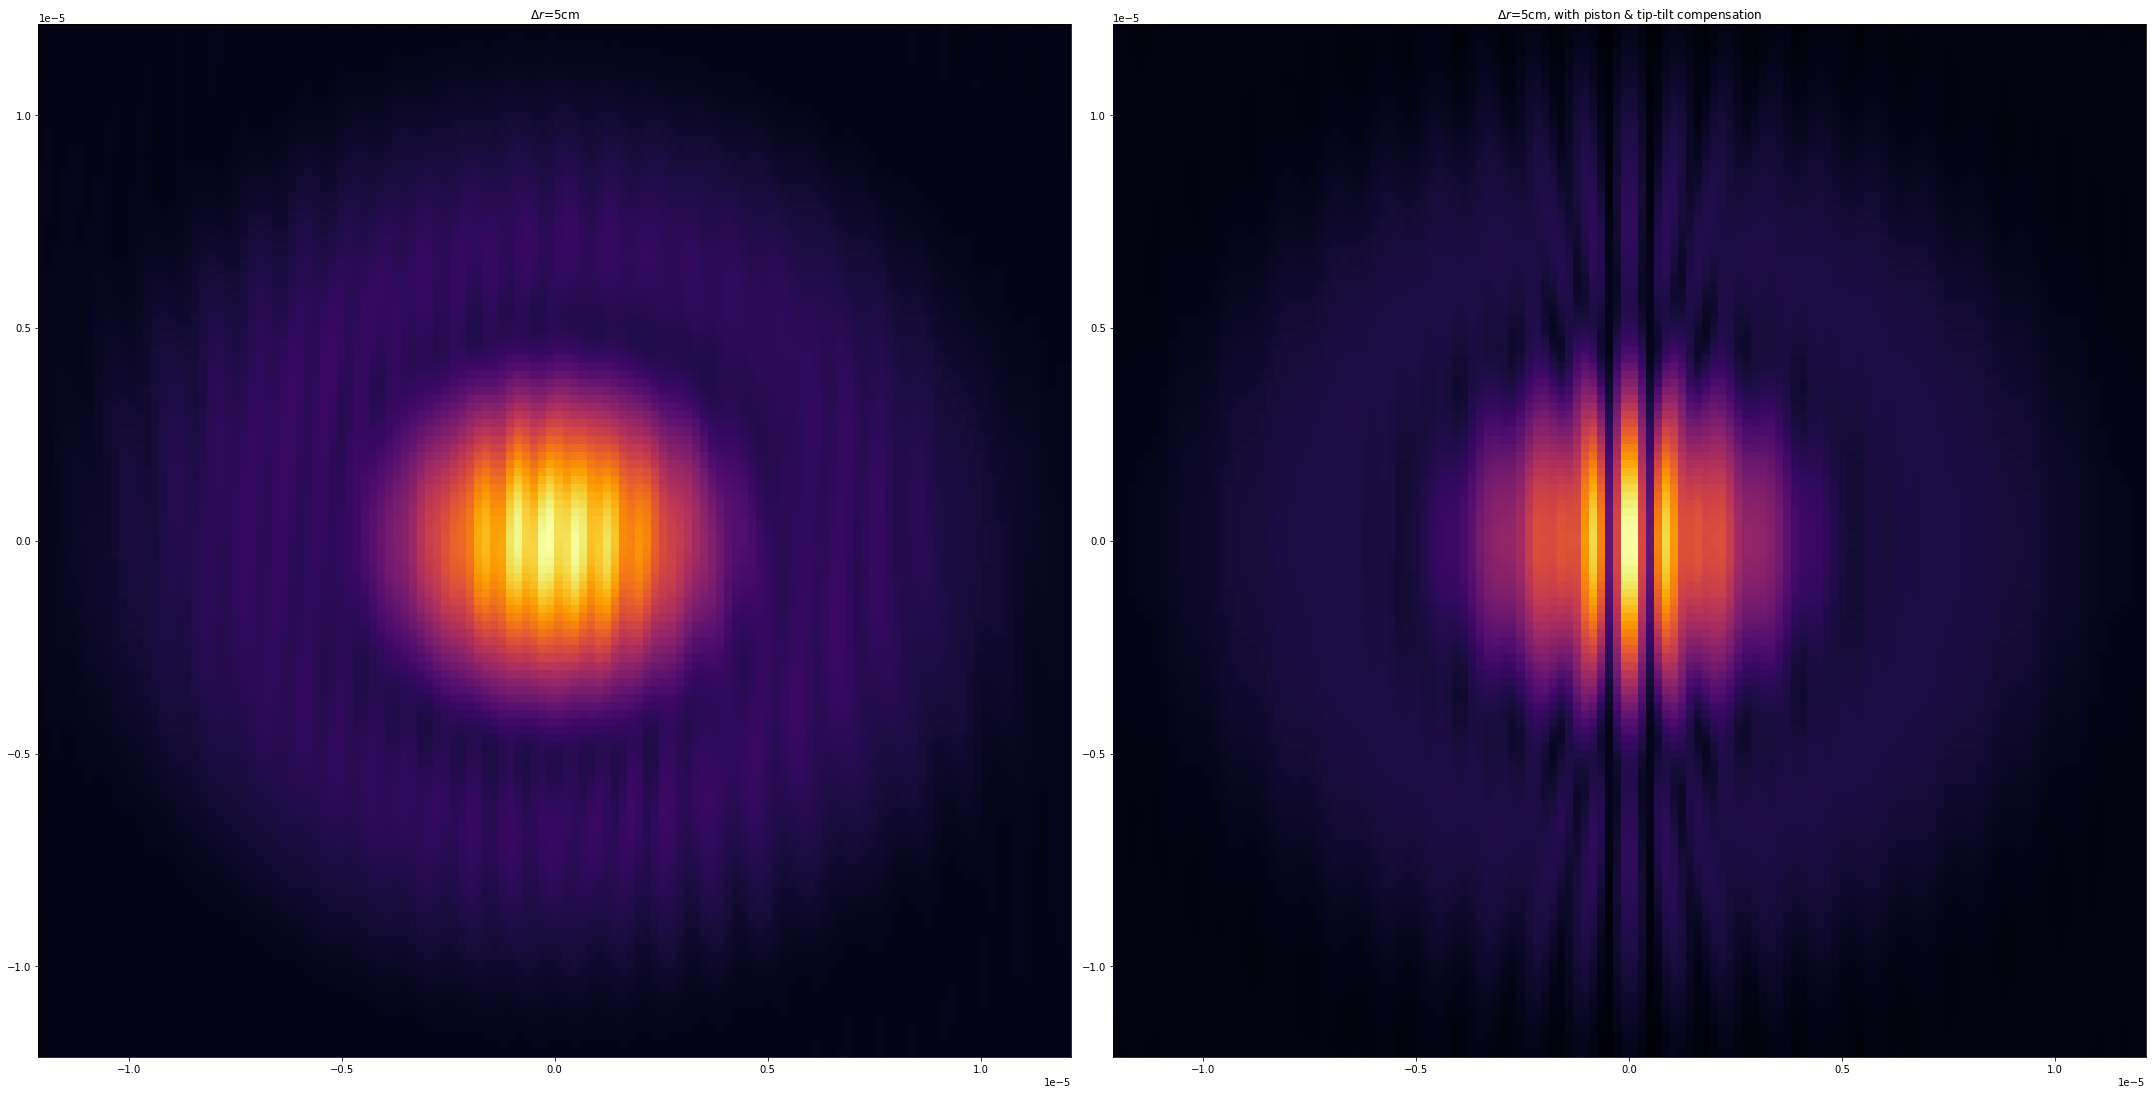

In [103]:
sim=op.SIM(detector_n=128,detector_fov=np.deg2rad(5./3600),detector_a=.01,init_b=10.)
det=sim.get_detectors()[0]
da=np.deg2rad(2.5/3600)
delta=np.arcsin(5e-6/100.)
opn=op.OpticalPathNetwork(sim)
I0=np.zeros((det.npxs,det.npxs))
for wl in np.arange(.7e-5,1.2e-5,1e-7):
    src=op.LightSource((0.,0.,np.inf),wavelength=wl)
    dp=np.random.normal([0.,0.,0.],5e-2)
    sim.collectors[0].move(dp)
    dat=opn.image(src,det,1e-3,verbose=False)
    I0+=np.abs(det.amplitude_map)**2.
sim.collectors[0].set_p([-5.,0.,0.])
I1=np.zeros((det.npxs,det.npxs))
for wl in np.arange(.7e-5,1.2e-5,1e-7):
    src=op.LightSource((0.,0.,np.inf),wavelength=wl)
    dp=np.random.normal([0.,0.,0.],5e-2)
    sim.collectors[0].move(dp)
    u0=np.array([[0.,0.,1.]]) # unit vector from periscope collector-end mirror to secondary mirror
    d0=(sim.periscopes[0].parts[1].p-sim.periscopes[0].parts[0].p)
    d1=(sim.periscopes[1].parts[1].p-sim.periscopes[1].parts[0].p)
    u1=np.transpose(op.quat.direction(d0)) # unit vector from periscope collector-end to combiner-end
    u2=(u0+u1)/np.linalg.norm(u0+u1,axis=-1).reshape((-1,1)) # required normal vector of periscope collector-end mirror
    lon,lat,_=op.quat.xyz2ptr(*u2.ravel())
    q0=np.array([np.cos((np.pi/2.-lat)/2.),np.sin((np.pi/2.-lat)/2.)*np.cos(np.pi/2.+lon),np.sin((np.pi/2.-lat)/2.)*np.sin(np.pi/2.+lon),0.])
    u3=(u0-u1)/np.linalg.norm(u0-u1,axis=-1).reshape((-1,1)) # required normal vector of periscope combiner-end mirror
    lon,lat,_=op.quat.xyz2ptr(*u3.ravel())
    q1=np.array([np.cos((np.pi/2.-lat)/2.),np.sin((np.pi/2.-lat)/2.)*np.cos(np.pi/2.+lon),np.sin((np.pi/2.-lat)/2.)*np.sin(np.pi/2.+lon),0.])
    sim.periscopes[0].parts[0].q=q0
    sim.periscopes[0].parts[1].q=q1
    sim.delaylines[0].move([
        0.,0.,
        np.squeeze(sim.delaylines[1].p[2])-\
        np.squeeze(sim.delaylines[0].p[2])-\
        np.squeeze((op.quat.norm(d0)-op.quat.norm(d1)-sim.collectors[0].p[2]+sim.collectors[1].p[2])/2.)])
    dat=opn.image(src,det,1e-3,verbose=False)
    I1+=np.abs(det.amplitude_map)**2.
fig=plt.figure(figsize=(30,15))
ax=fig.add_subplot(121)
ax.imshow(I0,norm=colors.PowerNorm(.5,0.,np.max(I0)),cmap='inferno',extent=(-da,da,-da,da))
ax.set_title(r'$\Delta r$=5cm')
ax=fig.add_subplot(122)
ax.imshow(I1,norm=colors.PowerNorm(.5,0.,np.max(I1)),cmap='inferno',extent=(-da,da,-da,da))
ax.set_title(r'$\Delta r$=5cm, with piston & tip-tilt compensation')
plt.tight_layout()